# Problema de clasificación Supervisada


### Descripción del problema:

Predicción del salario de una persona en función a sus características.

El objetivo del problema es predecir si una persona tiene un salario de más de 50 mil dólares anuales o no, en base a sus características. 

Haremos uso del dataset Adult. Este dataset proviene de la siguiente ruta de la University of California Irvine (**Url:** https://archive.ics.uci.edu/ml/datasets/Census+Income)

### Descripción del dataset:

Cuenta con un total de **14 variables predictoras X** y una **variable continua a predecir Y**.

El número total de muestras es de 32561 personas.

**Información de las variables:**

**Variable dependiente Y:**
TARGET: >50K, <=50K.

**Variables independientes X:**
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Carga de librerías:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Definición de funciones: 

# Lectura de datos:

In [2]:
# Defino la lista de nombres de las variables
nombres_columnas = ['edad', 'clase_trabajo', 'fnlwgt', 'educacion',
                   'educacion_num', 'estado_civil', 'ocupacion',
                    'relaciones', 'raza', 'sexo', 'ganancia_capital',
                    'perdida_capital', 'horas_por_semana', 'pais_nacimiento', 'target']
# Leo el dataset, el cual tiene un separador especial... lo normal es encontrarse ficheros
# separados por ',' o por ';'
XY = pd.read_csv('adult.data', sep=', ', names=nombres_columnas, index_col=False)

In [3]:
XY[:2]

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
print(u'- El número de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))
XY[:2]

- El número de filas en el dataset es: 32561
- El número de columnas en el dataset es: 15
- Los nombres de las variables son: ['edad', 'clase_trabajo', 'fnlwgt', 'educacion', 'educacion_num', 'estado_civil', 'ocupacion', 'relaciones', 'raza', 'sexo', 'ganancia_capital', 'perdida_capital', 'horas_por_semana', 'pais_nacimiento', 'target']


,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Preprocesamiento de datos

## Missings: 

Represento el conteo de valores faltantes por variable. En caso de haber, una de las formas de rellenarlos es:

    df['nombre_columna'] = df['nombre_columna'].fillna(valor)

In [5]:
XY.isnull().sum()

edad                0
clase_trabajo       0
fnlwgt              0
educacion           0
educacion_num       0
estado_civil        0
ocupacion           0
relaciones          0
raza                0
sexo                0
ganancia_capital    0
perdida_capital     0
horas_por_semana    0
pais_nacimiento     0
target              0
dtype: int64

## Categóricas a numéricas:

Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en modelos:

In [6]:
# Lista de variables categóricas
XY.select_dtypes(exclude=['number']).columns

Index(['clase_trabajo', 'educacion', 'estado_civil', 'ocupacion', 'relaciones',
       'raza', 'sexo', 'pais_nacimiento', 'target'],
      dtype='object')

Este objeto codifica las variables categóricas a números distintos. 

Más info en la url: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
le = LabelEncoder()

### clase_trabajo: 

In [8]:
XY['clase_trabajo'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: clase_trabajo, dtype: int64

Las muestras que sean distintas de Private los codifico como 0s, los Private como 1s.

In [9]:
XY.loc[XY['clase_trabajo'] != 'Private', 'clase_trabajo'] = 0
XY.loc[XY['clase_trabajo'] == 'Private', 'clase_trabajo'] = 1
XY['clase_trabajo'] = XY['clase_trabajo'].astype(int)

### educacion

In [10]:
XY['educacion'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: educacion, dtype: int64

Esta es otra forma de cambiar los valores de una variable. Se realiza con un mapeo de valores 1 a 1.

In [11]:
XY["educacion"].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: educacion, dtype: object

In [12]:
dic = {'Doctorate':0, 'Masters':1, 'Bachelors': 2, 'Some-college':3, 'Assoc-voc':4,
       'Assoc-acdm': 5, 'HS-grad': 6, 'Prof-school': 7, 'Preschool': 8,
       '12th': 9, '11th': 10, '10th': 11, '9th': 12, '7th-8th': 13,
       '5th-6th': 14, '1st-4th':15}

XY["educacion"].replace(dic, inplace=True)

In [13]:
XY["educacion"].head()

0     2
1     2
2     6
3    10
4     2
Name: educacion, dtype: int64

### estado_civil

In [14]:
XY['estado_civil'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: estado_civil, dtype: int64

Codifico con label encoder.

In [15]:
XY.estado_civil= le.fit_transform(XY.estado_civil.values)

### ocupacion

In [16]:
XY['ocupacion'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: ocupacion, dtype: int64

In [17]:
XY.ocupacion= le.fit_transform(XY.ocupacion.values)

### relaciones

In [18]:
XY['relaciones'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relaciones, dtype: int64

In [19]:
XY.relaciones= le.fit_transform(XY.relaciones.values)

### raza

In [20]:
XY['raza'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: raza, dtype: int64

In [21]:
XY.loc[XY.raza != 'White', 'raza'] = 0
XY.loc[XY.raza == 'White', 'raza'] = 1
XY.raza = XY.raza.astype(int)

### sexo

In [22]:
XY['sexo'].value_counts()

Male      21790
Female    10771
Name: sexo, dtype: int64

In [23]:
dic = {'Male':0, 'Female':1}
XY["sexo"].replace(dic, inplace=True)

### pais_nacimiento

In [24]:
XY['pais_nacimiento'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [25]:
XY.loc[XY.pais_nacimiento != 'United-States', 'pais_nacimiento'] = 0
XY.loc[XY.pais_nacimiento == 'United-States', 'pais_nacimiento'] = 1
XY.pais_nacimiento = XY.pais_nacimiento.astype(int)

### target

In [26]:
XY['target'].value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

La mayoría de las veces las targets hay que codificarlas.

En este caso, la target la codifico a 0s si es <50K y a 1s si es >50K.

In [27]:
dic = {'<=50K':0, '>50K':1}
XY["target"].replace(dic, inplace=True)

## Comprobación tipos no numéricos: 

Ya no tengo más tipos numéricos, continúo.

In [28]:
XY.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

## Division en features X + target Y 

In [29]:
X = XY.drop('target', axis=1)
Y = XY['target']

# Visualizaciones y correlaciones

## Descriptivos básicos:

In [30]:
XY.describe()

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento,target
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,0.697030,1.897784e+05,4.922238,10.080679,2.611836,6.572740,1.446362,0.854274,0.330795,1077.648844,87.303830,40.437456,0.895857,0.240810
std,13.640433,0.459549,1.055500e+05,3.085071,2.572720,1.506222,4.228857,1.606771,0.352837,0.470506,7385.292085,402.960219,12.347429,0.305451,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.178270e+05,3.000000,9.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,6.000000,12.000000,4.000000,10.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


## Boxplots: 

In [31]:
X_normalizado = (X-X.mean())/X.std()

In [32]:
X_normalizado[:2]

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento
0,0.030670,-1.516769,-1.063594,-0.947219,1.134721,0.921620,-1.317789,-0.277801,0.413013,-0.703061,0.148451,-0.216656,-0.035429,0.340949
1,0.837096,-1.516769,-1.008692,-0.947219,1.134721,-0.406206,-0.608377,-0.900167,0.413013,-0.703061,-0.145918,-0.216656,-2.222119,0.340949


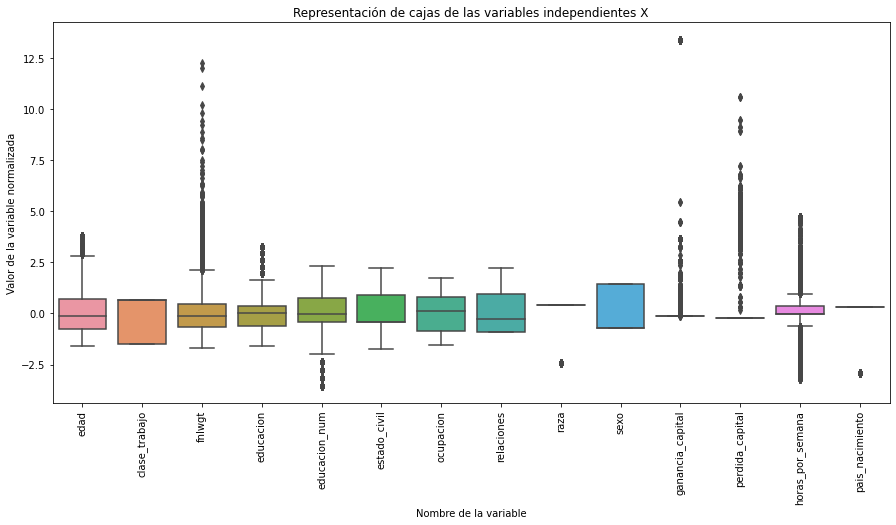

In [33]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

## Histogramas: 

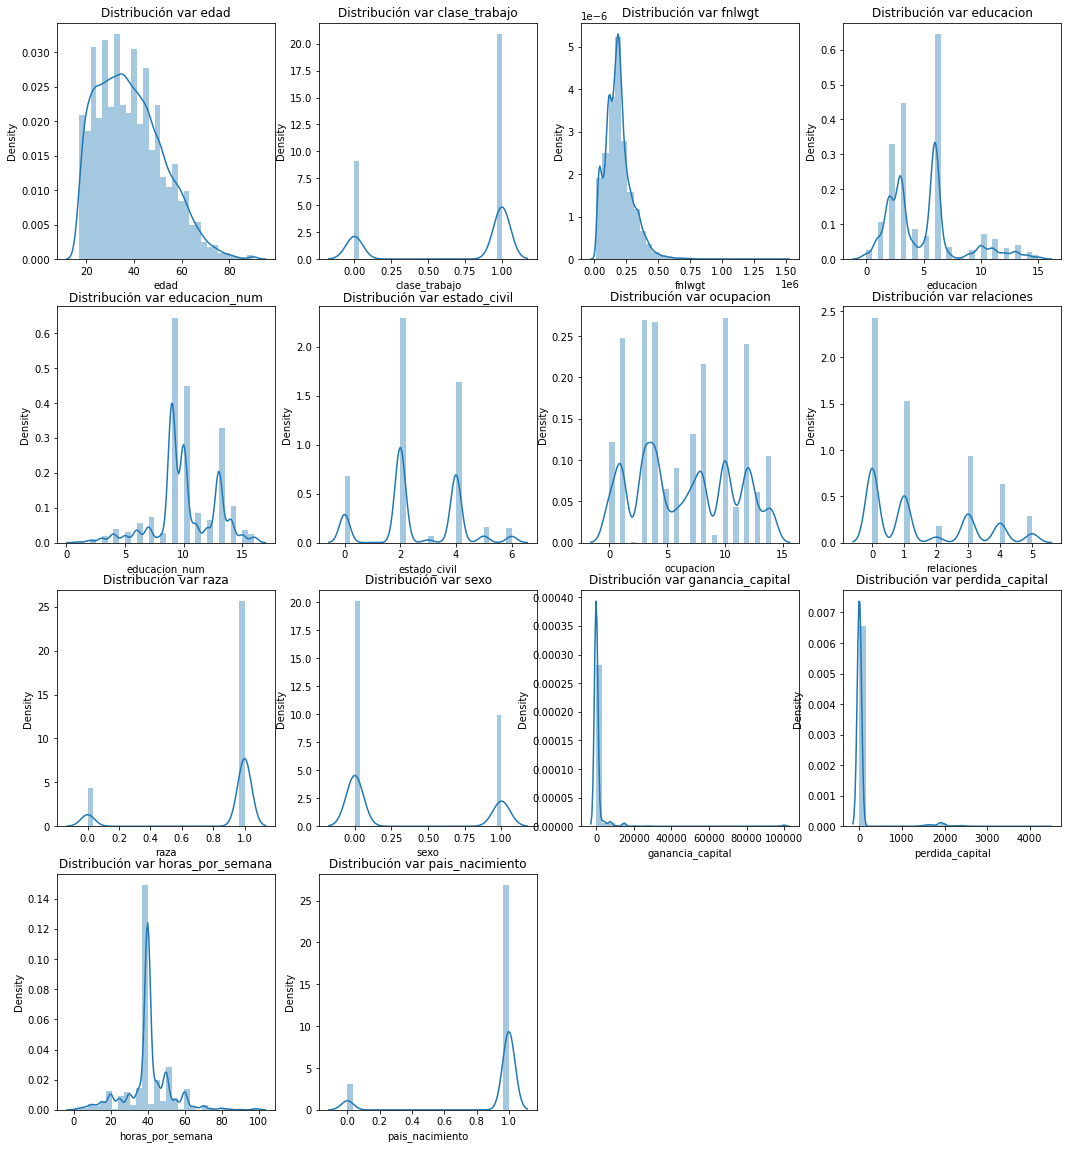

In [34]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(4, 4, n)
    try:
        sns.distplot(X[column], bins=30)
    except:
        pass
    plt.title('Distribución var {}'.format(column))
plt.show()

## Relación variable vs target: 

Estos gráficos son interesantes para analizar el poder predictivo de las variables. Cuanto más se separen las dos distribuciones, mejor para predecir ya que es más fácil discriminarlas.

## Matriz de correlaciones: 

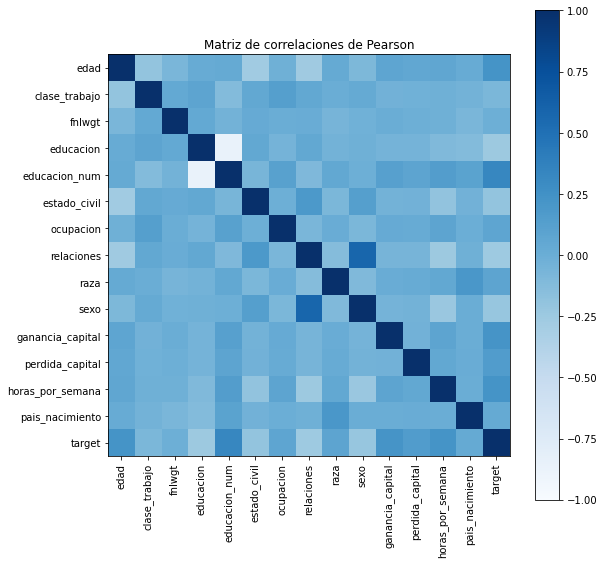

In [35]:
matriz_correlaciones = XY.corr(method='pearson')
n_ticks = len(XY.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

## Estandarización de los datos previa: 

Como se comenta en la unidad, hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar.

Además, la inversa se puede realizar de forma sencilla.

In [36]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [37]:
X

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_nacimiento
0,39,0,77516,2,13,4,1,1,1,0,2174,0,40,1
1,50,0,83311,2,13,2,4,0,1,0,0,0,13,1
2,38,1,215646,6,9,0,6,1,1,0,0,0,40,1
3,53,1,234721,10,7,2,6,0,0,0,0,0,40,1
4,28,1,338409,2,13,2,10,5,0,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,257302,5,12,2,13,5,1,1,0,0,38,1
32557,40,1,154374,6,9,2,7,0,1,0,0,0,40,1
32558,58,1,151910,6,9,6,1,4,1,1,0,0,40,1
32559,22,1,201490,6,9,4,1,3,1,0,0,0,20,1


In [38]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target, Length: 32561, dtype: int64

## División en train y test: 

El conjunto de test NUNCA se usa para ajustar los modelos. Es un conjunto que se separa y se valida al final del todo para obtener una métrica.

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Aplicamos un modelo de regresión logística

## Aplicamos un modelo de clasificación lineal

### Optimizando C y class_weight con GridSearch 

In [40]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de **C** y **class_weights**.

In [41]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 3, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

#### Analizando el modelo con el mejor alpha 

En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior:

In [42]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

Ajusto a todos los datos de entrenamiento.

In [43]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

Aquí es cuando entra en juego el conjunto de Test. Cuando se quiere validar un modelo ya elegido y optimizado.

Con ese modelo optimizado, predigo test para ver cómo se comporta en datos que no ha visto antes.

In [44]:
y_test_pred_prob = reg_log.predict_proba(X_test)

## Umbralizo las predicciones:

Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0.

In [45]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [46]:
Y_test.shape

(6513,)

In [47]:
Y_test

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
7694     1
10410    0
1043     1
30860    0
12467    1
Name: target, Length: 6513, dtype: int64

In [48]:
y_umbralizadas.shape

(6513,)

In [49]:
y_umbralizadas


array([0, 0, 0, ..., 1, 1, 0])

In [50]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
    

Matriz de confusión
 [[4132  786]
 [ 537 1058]]


# Aplicamos un modelo de arboles de decision

In [51]:
from sklearn.tree import DecisionTreeRegressor


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

In [81]:
# Obtengo el mejor parámetro de profundidad del árbol entre 3 y 7 usando 
# validación cruzada y gridsearch
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=6)


In [54]:

y_test_pred = regr_opt.predict(X_test)
y_test_pred.shape

(6513,)

# Umbralizo las predicciones

In [55]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

In [56]:
Y_test.shape

(6513,)

In [57]:
Y_test

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
7694     1
10410    0
1043     1
30860    0
12467    1
Name: target, Length: 6513, dtype: int64

In [58]:
y_umbralizadas.shape

(6513,)

In [59]:
y_umbralizadas

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
    

Matriz de confusión
 [[4687  231]
 [ 743  852]]


# Aplicamos el modelo de KNN Vecinos

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
clf = KNeighborsRegressor()
params1 = {"n_neighbors": range(1, 20)}

In [ ]:
moknn = GridSearchCV(regr, params1, cv=3)


In [87]:
moknn.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

In [88]:
y_test_pred = moknn.predict(X_test)

# Umbralizo las predicciones

In [91]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

In [93]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[4666  252]
 [ 882  713]]
